                        Lab Report – KNN on Diabetes Dataset  

                        
Name: Aayush Suthar 
                                                                     
Reg.No: 23FE10CAI00275

DATE: 8 SEPT 2025   
      
    Aim:

Implement and evaluate the K-Nearest Neighbors (KNN) classifier on the Diabetes dataset (with missing values) to analyze how different values of K affect accuracy and decision boundaries.


    Learning Objectives:
• Data handling and visualization: Load the Iris dataset, visualize class distributions using key feature pairs (sepal and petal dimensions), and interpret separability between classes.

• Hyperparameter exploration: Train KNN with specified K values (3, 8, 12, 18, 20, 30, 45) and discuss overfitting with small K vs. underfitting with large K.

• Decision boundary interpretation: Plot and analyze 2D decision boundaries (e.g., petal length vs. petal width) to connect K choices with boundary smoothness and class overlap.

  

In [21]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


In [22]:
# 2. Load dataset
df = pd.read_csv("Diabetes Missing Data.csv") 
print("Shape:", df.shape)
display(df.head())
print("\nMissing values:\n", df.isnull().sum())



Shape: (768, 9)


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1



Missing values:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [23]:
# 3. Impute missing values (replace NaN with median)
X = df.drop("Class", axis=1)
y = df["Class"].values

imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Missing after imputation:\n", X_imputed.isnull().sum())
display(X_imputed.describe())


Missing after imputation:
 Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
dtype: int64


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Class distribution:
 0    500
1    268
Name: count, dtype: int64


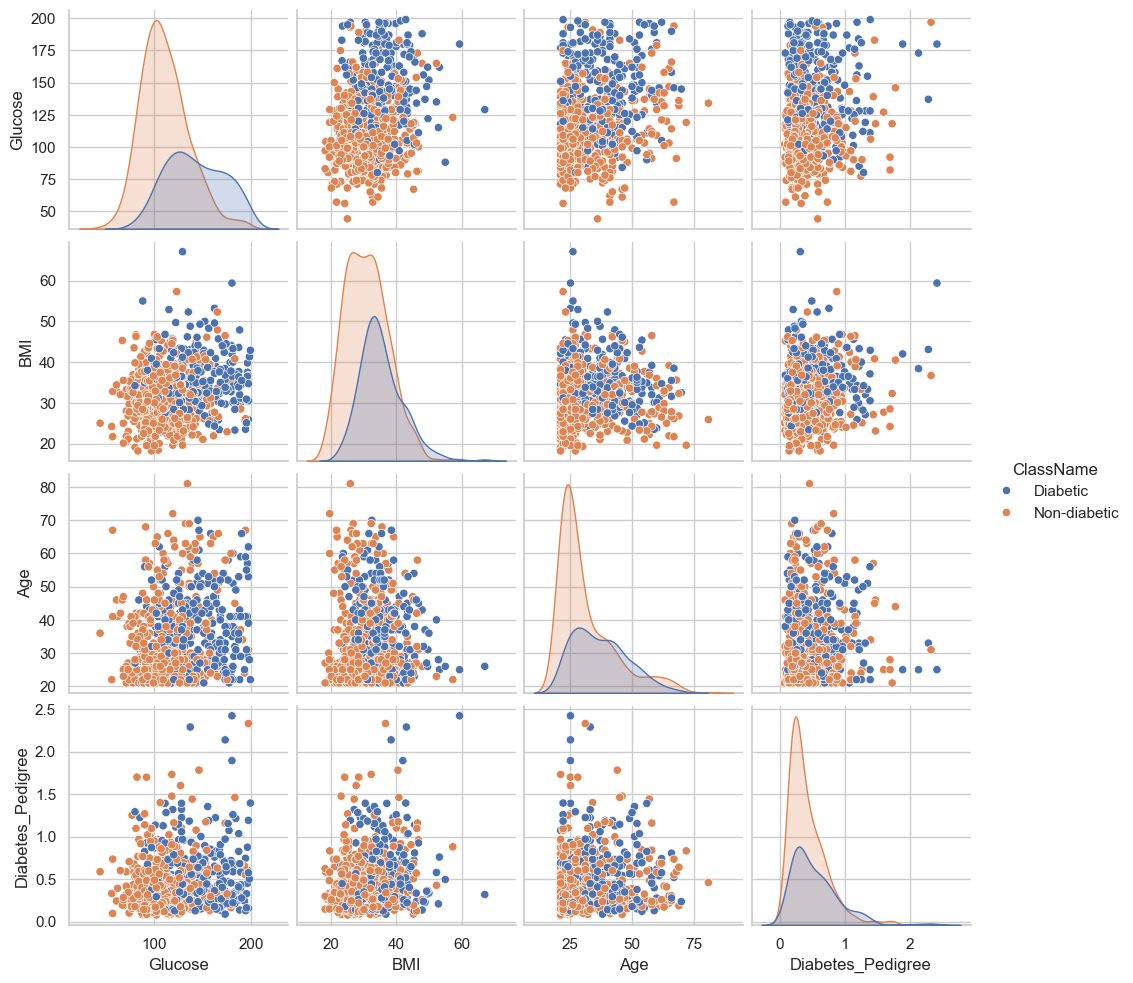

In [24]:
# 4. Exploratory Data Analysis (EDA)
print("Class distribution:\n", pd.Series(y).value_counts())

X_plot = X_imputed.copy()
X_plot["Class"] = y
X_plot["ClassName"] = X_plot["Class"].map({0:"Non-diabetic", 1:"Diabetic"})

# Pairplot for subset of features (Glucose, BMI, Age, Diabetes_Pedigree)
sns.pairplot(X_plot, hue="ClassName", vars=["Glucose", "BMI", "Age", "Diabetes_Pedigree"])
plt.show()


In [25]:
# 5. Train/Test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed.values, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape, "Test shape:", X_test_scaled.shape)


Train shape: (537, 8) Test shape: (231, 8)


In [26]:
# 6. Train & evaluate for different K values
k_values = [3, 8, 12, 18, 20, 30, 45]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({"k": k, "accuracy": acc, "error": 1 - acc})

results_df = pd.DataFrame(results)
results_df


,k,accuracy,error
0,3,0.740260,0.259740
1,8,0.748918,0.251082
2,12,0.727273,0.272727
3,18,0.744589,0.255411
4,20,0.748918,0.251082
5,30,0.731602,0.268398
6,45,0.727273,0.272727


Best K: 8

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



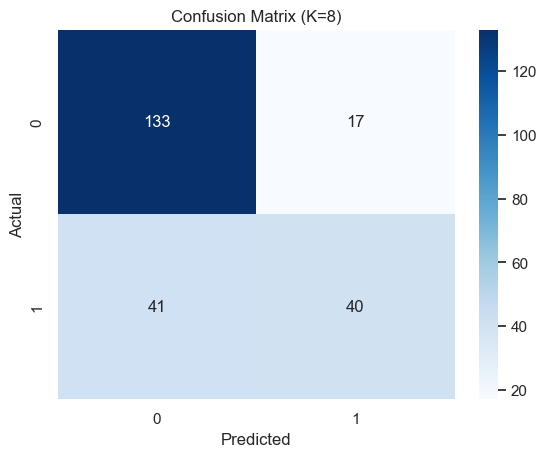

In [27]:
# 7. Pick best K and show confusion matrix
best_k = results_df.loc[results_df["accuracy"].idxmax(), "k"]
print("Best K:", best_k)

best_knn = KNeighborsClassifier(n_neighbors=int(best_k))
best_knn.fit(X_train_scaled, y_train)
y_best_pred = best_knn.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_best_pred))

cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


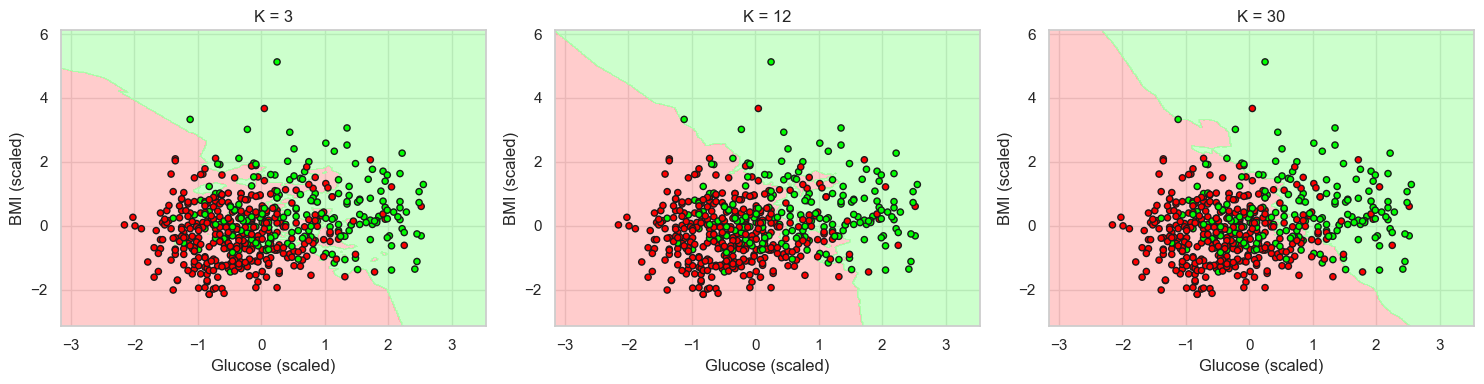

In [28]:
# Plot decision boundaries for multiple K values side by side
feat_idx = [1, 5]  # Glucose & BMI
X2 = X_imputed.iloc[:, feat_idx].values
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, stratify=y2, random_state=42
)

scaler2 = StandardScaler()
X2_train_s = scaler2.fit_transform(X2_train)

def plot_decision_boundaries_side_by_side(X_train_s, y_train, k_values):
    fig, axes = plt.subplots(1, len(k_values), figsize=(15, 4))  # row=1, col=len(Ks)

    for ax, k in zip(axes, k_values):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_s, y_train)

        x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
        y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
        h = 0.02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA"])
        cmap_bold = ListedColormap(["#FF0000", "#00FF00"])

        ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
        ax.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train, cmap=cmap_bold, edgecolor="k", s=20)
        ax.set_xlabel("Glucose (scaled)")
        ax.set_ylabel("BMI (scaled)")
        ax.set_title(f"K = {k}")

    plt.tight_layout()
    plt.show()

# Plot all in one row
plot_decision_boundaries_side_by_side(X2_train_s, y2_train, [3, 12, 30])


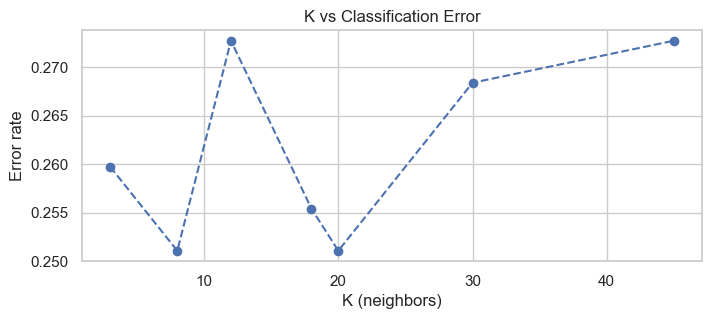

In [29]:
# 9. Plot K vs Error
plt.figure(figsize=(8,3))
plt.plot(results_df["k"], results_df["error"], marker="o", linestyle="--")
plt.title("K vs Classification Error")
plt.xlabel("K (neighbors)")
plt.ylabel("Error rate")
plt.grid(True)
plt.show()


Observations:

Small K (e.g., 3): High variance, complex boundaries (overfitting risk).  
Large K (e.g., 30): Smooth boundaries, may underfit.   
Best K: Found by comparing accuracy/error.

Conclusion:

KNN performance depends strongly on choice of K. Proper preprocessing (handling missing data, scaling) is crucial. Best K provides a balance between bias and variance.
